# The Spark Foundation

# Data Science and Bussiness Analytics Intern GRIP June-2021

# By Ashwani Roy

# Task-2 Prediction Using Unsupervised ML 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import seaborn as sns

# Importing Dataset

In [2]:
iris_dataset=pd.read_csv('Iris.csv')
print("Iris Dataset load successfully")

Iris Dataset load successfully


In [3]:
iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_dataset.shape

(150, 6)

In [6]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_dataset.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
iris_dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris_dataset['Species'].get_values()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [11]:
iris_dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
iris_dataset.drop

<bound method DataFrame.drop of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [13]:
iris_dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Visualization of Iris Dataset

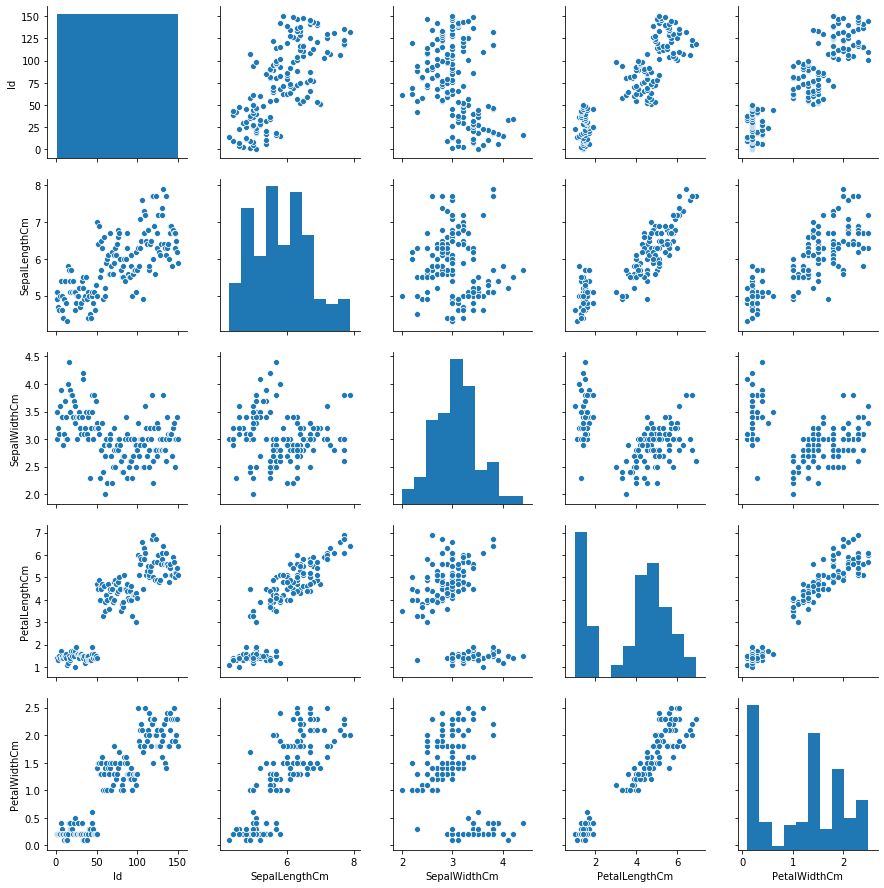

In [14]:
sns.pairplot(iris_dataset)

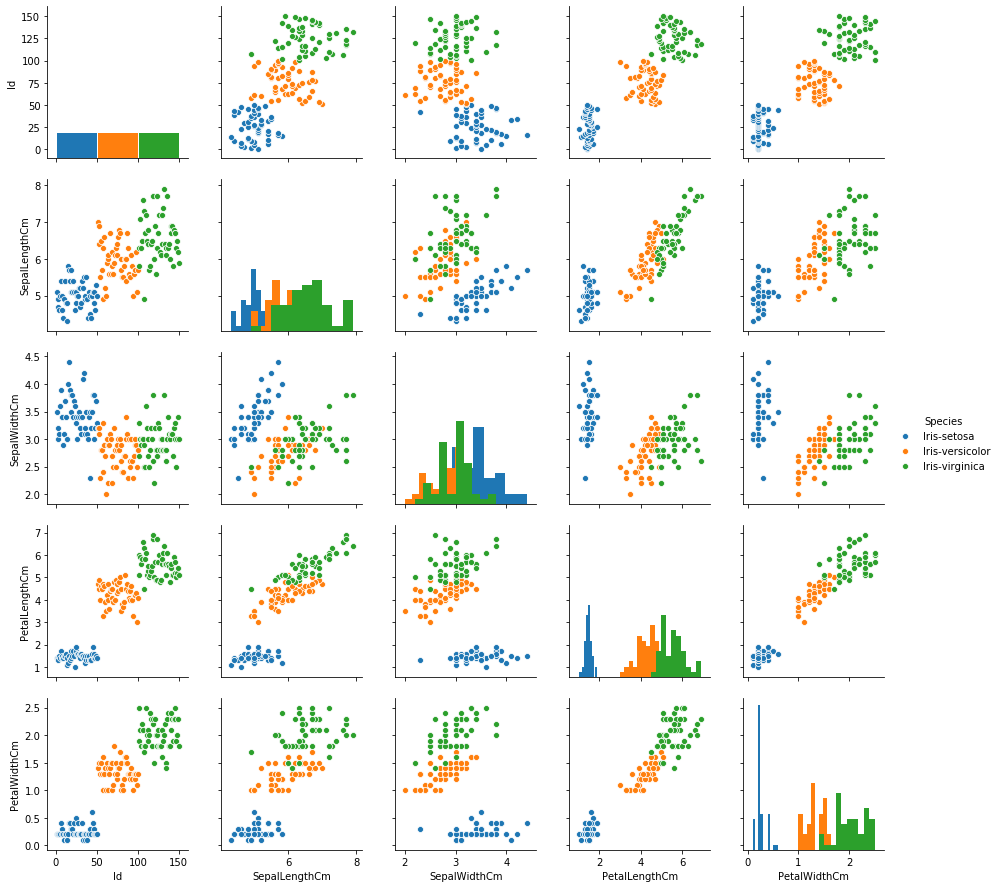

In [15]:
sns.pairplot(iris_dataset,hue="Species",diag_kind="hist")

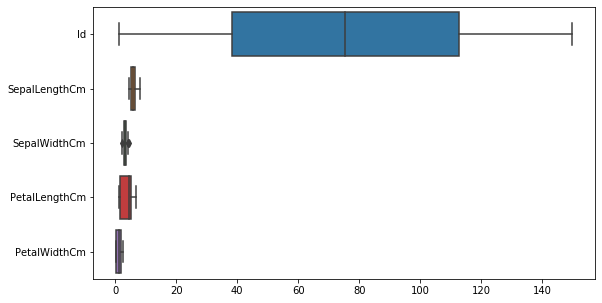

In [16]:
plt.figure(figsize=(9,5))
sns.boxplot(data=iris_dataset, orient='h')

In [17]:
x=iris_dataset.iloc[:,[0,2]].values

In [18]:
print(x)

[[  1.    3.5]
 [  2.    3. ]
 [  3.    3.2]
 [  4.    3.1]
 [  5.    3.6]
 [  6.    3.9]
 [  7.    3.4]
 [  8.    3.4]
 [  9.    2.9]
 [ 10.    3.1]
 [ 11.    3.7]
 [ 12.    3.4]
 [ 13.    3. ]
 [ 14.    3. ]
 [ 15.    4. ]
 [ 16.    4.4]
 [ 17.    3.9]
 [ 18.    3.5]
 [ 19.    3.8]
 [ 20.    3.8]
 [ 21.    3.4]
 [ 22.    3.7]
 [ 23.    3.6]
 [ 24.    3.3]
 [ 25.    3.4]
 [ 26.    3. ]
 [ 27.    3.4]
 [ 28.    3.5]
 [ 29.    3.4]
 [ 30.    3.2]
 [ 31.    3.1]
 [ 32.    3.4]
 [ 33.    4.1]
 [ 34.    4.2]
 [ 35.    3.1]
 [ 36.    3.2]
 [ 37.    3.5]
 [ 38.    3.1]
 [ 39.    3. ]
 [ 40.    3.4]
 [ 41.    3.5]
 [ 42.    2.3]
 [ 43.    3.2]
 [ 44.    3.5]
 [ 45.    3.8]
 [ 46.    3. ]
 [ 47.    3.8]
 [ 48.    3.2]
 [ 49.    3.7]
 [ 50.    3.3]
 [ 51.    3.2]
 [ 52.    3.2]
 [ 53.    3.1]
 [ 54.    2.3]
 [ 55.    2.8]
 [ 56.    2.8]
 [ 57.    3.3]
 [ 58.    2.4]
 [ 59.    2.9]
 [ 60.    2.7]
 [ 61.    2. ]
 [ 62.    3. ]
 [ 63.    2.2]
 [ 64.    2.9]
 [ 65.    2.9]
 [ 66.    3.1]
 [ 67.    

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans=KMeans(n_clusters=9)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
y_kmeans=kmeans.predict(x)

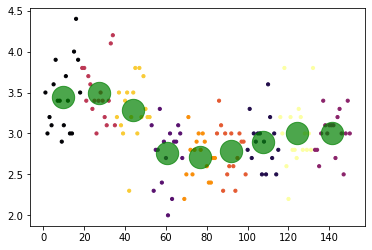

In [29]:
plt.scatter(x[:,0],x[:,1], c=y_kmeans, s=10, cmap='inferno')

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green',s=500, alpha=0.7);

In [30]:
kmeans.inertia_

3509.2151560457514

In [31]:
sse_=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k).fit(x)
    sse_.append([k, kmeans.inertia_])

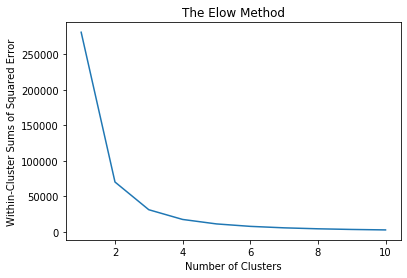

In [32]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.title('The Elow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sums of Squared Error')
plt.show()

# Predict the Optimum Number of Clusters Using Silhouette Analysis

In [34]:
from sklearn.metrics import silhouette_score

In [36]:
sse_=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(x)
    sse_.append([k,silhouette_score(x,kmeans.labels_)])

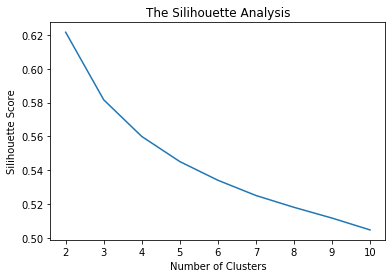

In [37]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1]);
plt.title('The Silihouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silihouette Score')
plt.show()

# Thank You